<a href="https://colab.research.google.com/github/seonae0223/mid_project/blob/main/%EC%86%8C%EB%93%9D_%EB%B6%84%EC%9C%84_%EA%B2%B0%EC%A0%95_%EC%9A%94%EC%9D%B8_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 폰트 설정

In [12]:
plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumGothic'] 10.0


In [11]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 전처리된 데이터 불러오기

In [46]:
import pandas as pd
import numpy as np

FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/cleansed.csv"
df_income = pd.read_csv(FILE_PATH) # encoding='euc-kr' : 한글로 읽어오기
df_income.head()

,Unnamed: 0,MD제공용_가구고유번호,수도권여부,가구주_성별코드,가구원수,노인가구여부,조손가구여부,한부모가구여부,다문화가구여부(2012년~),장애인가구여부(2012년~)(보완),...,자산,자산_금융자산,자산_실물자산,부채,원리금상환금액,경상소득(보완),이전소득(보완)[공적이전소득(보완)+사적이전소득(조사)],지출_소비지출비,지출_비소비지출(보완),가구주_은퇴여부
0,0,10000162,1,2,1,1,0,0,0,0,...,5700,5700,0,0,0,1655,1281,1175,121,1
1,1,10000182,1,1,2,0,0,0,0,0,...,13720,13220,500,0,0,2995,27,2790,425,1
2,2,10000192,1,2,1,0,0,0,0,0,...,1410,1410,0,0,110,3001,0,1210,109,1
3,3,10000212,0,2,1,1,0,0,0,0,...,16800,10300,6500,300,0,1871,1124,1222,27,1
4,4,10000222,0,1,1,0,0,0,0,0,...,17000,11000,6000,9000,178,3603,0,1466,614,1


In [47]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18094 entries, 0 to 18093
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Unnamed: 0                       18094 non-null  int64
 1   MD제공용_가구고유번호                     18094 non-null  int64
 2   수도권여부                            18094 non-null  int64
 3   가구주_성별코드                         18094 non-null  int64
 4   가구원수                             18094 non-null  int64
 5   노인가구여부                           18094 non-null  int64
 6   조손가구여부                           18094 non-null  int64
 7   한부모가구여부                          18094 non-null  int64
 8   다문화가구여부(2012년~)                  18094 non-null  int64
 9   장애인가구여부(2012년~)(보완)              18094 non-null  int64
 10  가구주_교육정도_통합코드                    18094 non-null  int64
 11  가구주_동거여부                         18094 non-null  int64
 12  가구주_산업대분류코드                      18094 non-nul

In [48]:
df_income.describe()

,Unnamed: 0,MD제공용_가구고유번호,수도권여부,가구주_성별코드,가구원수,노인가구여부,조손가구여부,한부모가구여부,다문화가구여부(2012년~),장애인가구여부(2012년~)(보완),...,자산,자산_금융자산,자산_실물자산,부채,원리금상환금액,경상소득(보완),이전소득(보완)[공적이전소득(보완)+사적이전소득(조사)],지출_소비지출비,지출_비소비지출(보완),가구주_은퇴여부
count,18094.000000,1.809400e+04,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,...,1.809400e+04,1.809400e+04,1.809400e+04,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000
mean,9046.500000,4.865128e+08,0.319719,1.286338,2.308832,0.280701,0.002874,0.018183,0.013706,0.133470,...,5.005981e+04,1.129309e+04,3.876672e+04,7608.145849,979.036642,6194.593125,846.119929,2745.138223,1141.080469,1.220128
std,5223.432221,2.859796e+08,0.466381,0.452062,1.202952,0.449354,0.053533,0.133616,0.116272,0.340091,...,8.903165e+04,2.349617e+04,7.777590e+04,19786.243535,3445.365396,6979.917454,1005.615385,1956.080362,2674.162747,0.414344
min,0.000000,1.000016e+07,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,147.000000,0.000000,1.000000
25%,4523.250000,2.320003e+08,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.512500e+03,1.380000e+03,1.400000e+03,0.000000,0.000000,2282.000000,80.000000,1338.000000,152.250000,1.000000
50%,9046.500000,4.909003e+08,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.624800e+04,4.900000e+03,1.770000e+04,500.000000,30.000000,4612.500000,620.000000,2262.000000,566.000000,1.000000
75%,13569.750000,7.232003e+08,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,5.912900e+04,1.258000e+04,4.659875e+04,7900.000000,900.000000,8090.750000,1191.000000,3664.750000,1361.000000,1.000000
max,18093.000000,9.919003e+08,1.000000,2.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.667350e+06,1.075459e+06,3.507500e+06,807000.000000,202257.000000,338484.000000,10724.000000,25660.000000,199712.000000,2.000000


# 필요없는 컬럼 삭제

In [49]:
df_income.drop(columns=['Unnamed: 0'], inplace=True)

In [50]:
df_income.columns

Index(['MD제공용_가구고유번호', '수도권여부', '가구주_성별코드', '가구원수', '노인가구여부', '조손가구여부',
       '한부모가구여부', '다문화가구여부(2012년~)', '장애인가구여부(2012년~)(보완)', '가구주_교육정도_통합코드',
       '가구주_동거여부', '가구주_산업대분류코드', '가구주_직업대분류코드', '가구주연령_10세단위코드',
       '가구주_종사상지위(보도용)', '가구주_혼인상태코드', '입주형태통합코드', '주택종류통합코드', '부채보유여부',
       '자산총액10분위코드', '순자산10분위코드', '자산', '자산_금융자산', '자산_실물자산', '부채', '원리금상환금액',
       '경상소득(보완)', '이전소득(보완)[공적이전소득(보완)+사적이전소득(조사)]', '지출_소비지출비',
       '지출_비소비지출(보완)', '가구주_은퇴여부'],
      dtype='object')

In [51]:
# 모든 컬럼과 데이터 타입을 확인
print(df_income.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18094 entries, 0 to 18093
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   MD제공용_가구고유번호                     18094 non-null  int64
 1   수도권여부                            18094 non-null  int64
 2   가구주_성별코드                         18094 non-null  int64
 3   가구원수                             18094 non-null  int64
 4   노인가구여부                           18094 non-null  int64
 5   조손가구여부                           18094 non-null  int64
 6   한부모가구여부                          18094 non-null  int64
 7   다문화가구여부(2012년~)                  18094 non-null  int64
 8   장애인가구여부(2012년~)(보완)              18094 non-null  int64
 9   가구주_교육정도_통합코드                    18094 non-null  int64
 10  가구주_동거여부                         18094 non-null  int64
 11  가구주_산업대분류코드                      18094 non-null  int64
 12  가구주_직업대분류코드                      18094 non-nul

# 각 컬럼 별 값의 이상치 탐지

In [8]:
# IQR 방법을 사용한 이상치 탐지 함수
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [9]:
import pandas as pd

# 결측치와 이상치를 탐지하여 요약하는 함수
def check_missing_and_outliers(df):
    summary = []

    for column in df.columns:
        # 결측치 확인
        missing = df[column].isnull().sum()

        # 이상치 탐지 (수치형 데이터만)
        if df[column].dtype in ['int64', 'float64']:
            outliers = detect_outliers(df, column)
            outliers_count = len(outliers)
        else:
            outliers_count = '수치형 아님'  # 수치형이 아닌 경우 "수치형 아님"으로 표시

        # 결과를 리스트에 추가
        summary.append({
            '컬럼': column,
            '결측치 수': missing,
            '이상치 수': outliers_count
        })

    # 리스트를 데이터프레임으로 변환
    summary_df = pd.DataFrame(summary)

    return summary_df

# 결측치 및 이상치 요약 확인
summary_df = check_missing_and_outliers(df_income)
summary_df


,컬럼,결측치 수,이상치 수
0,MD제공용_가구고유번호,0,0
1,수도권여부,0,0
2,가구주_성별코드,0,0
3,가구원수,0,24
4,노인가구여부,0,0
5,조손가구여부,0,52
6,한부모가구여부,0,329
7,다문화가구여부(2012년~),0,248
8,장애인가구여부(2012년~)(보완),0,2415
9,가구주_교육정도_통합코드,0,0


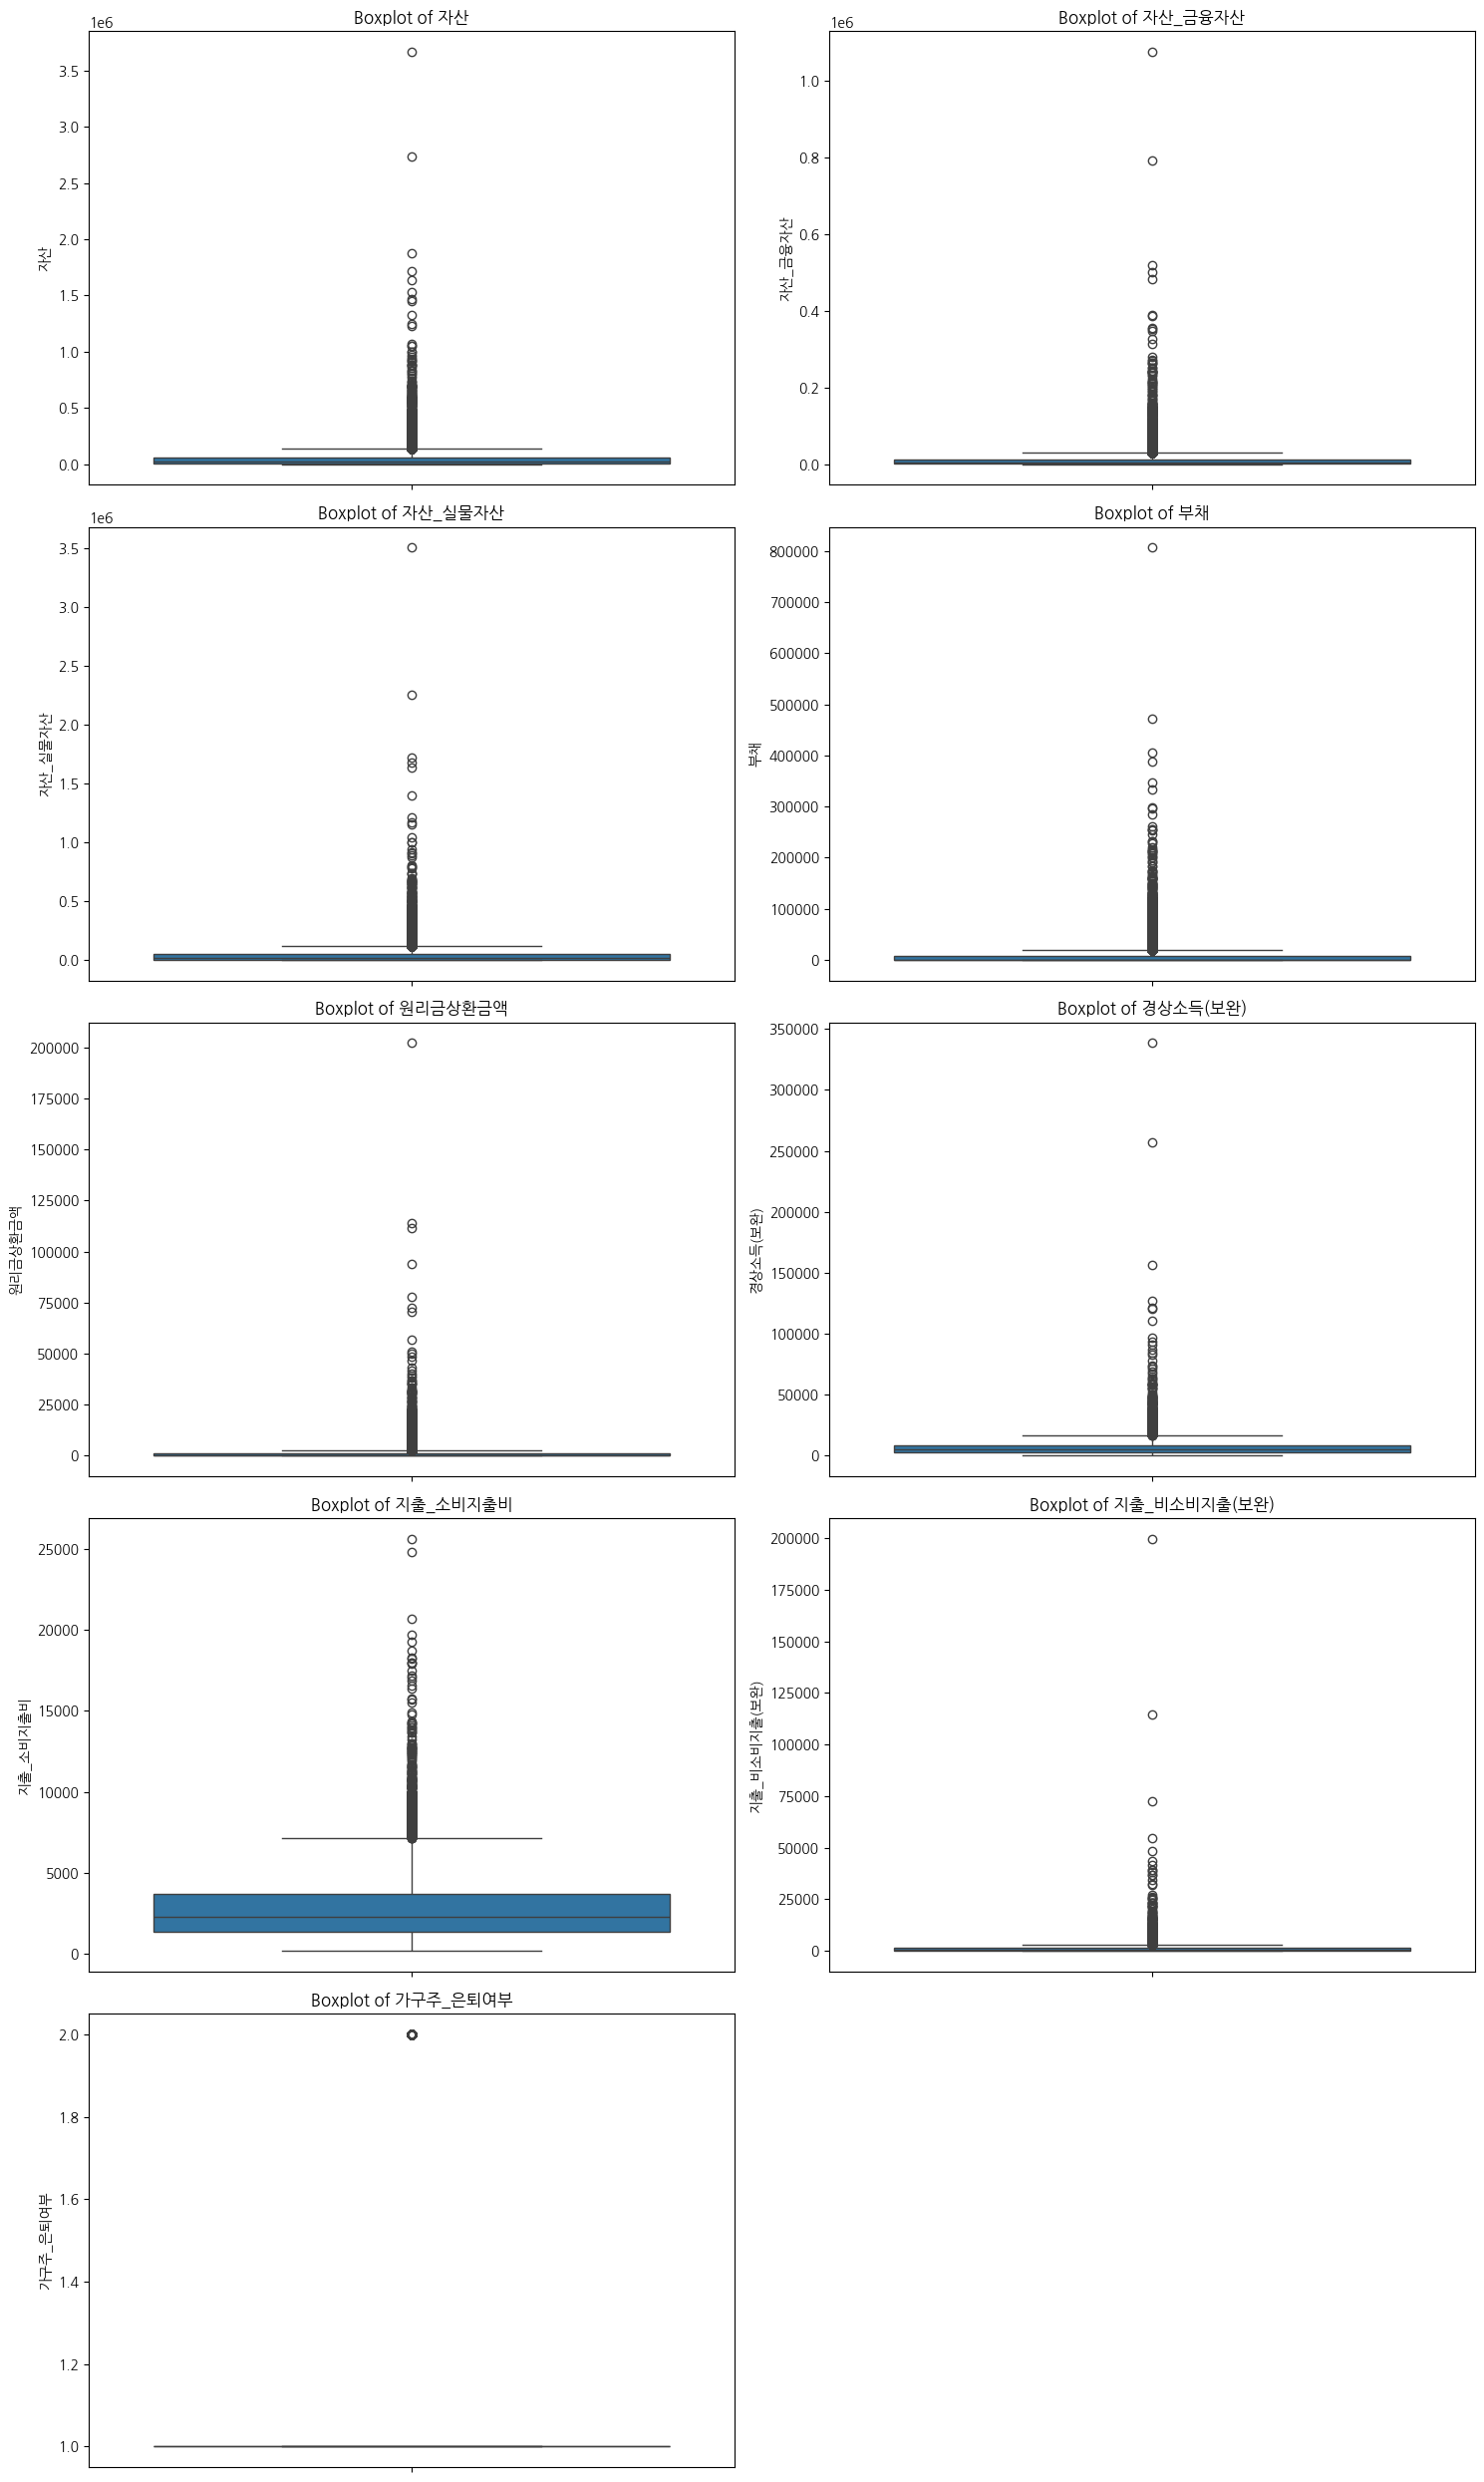

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 출력할 컬럼들 리스트
columns_to_plot = ['자산', '자산_금융자산', '자산_실물자산', '부채', '원리금상환금액', '경상소득(보완)',
                    '지출_소비지출비', '지출_비소비지출(보완)', '가구주_은퇴여부']  # 원하는 컬럼 이름들로 변경

# 컬럼 수에 따라 행과 열 설정 (한 행에 3개의 그래프)
num_columns = 2  # 한 행에 3개의 그래프를 배치
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns  # 필요한 행의 개수 계산

plt.figure(figsize=(15, 5 * num_rows))  # 전체 그래프의 크기 설정

# 각 컬럼에 대해 boxplot 그리기
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(data=df_income, y=column)
    plt.title(f'Boxplot of {column}')

# 그래프 간 간격 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()


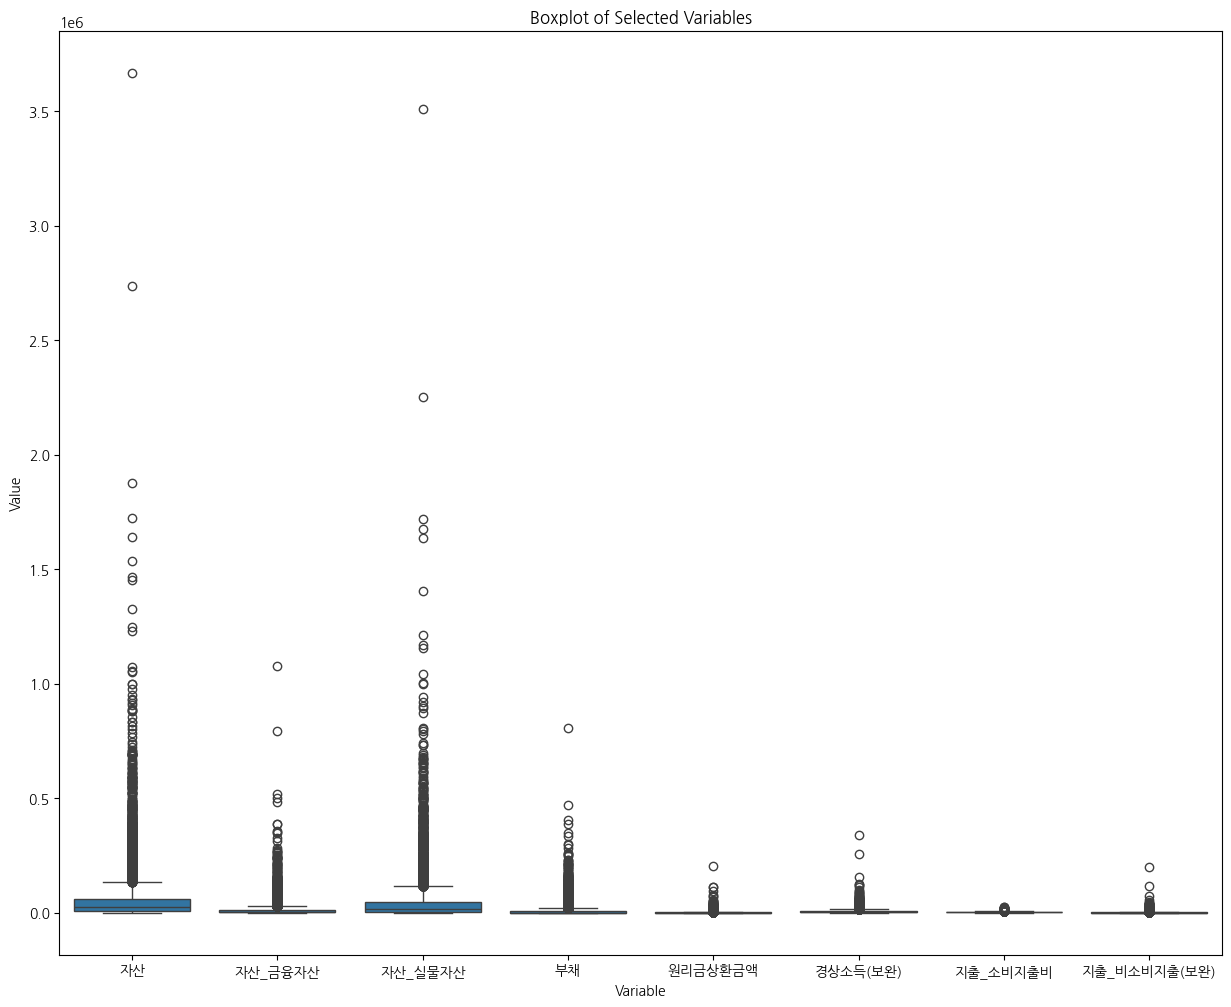

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 분석할 주요 변수 목록
columns_to_plot = ['자산', '자산_금융자산', '자산_실물자산', '부채', '원리금상환금액', '경상소득(보완)', '지출_소비지출비', '지출_비소비지출(보완)']

# 박스플롯을 이용해 이상치 시각화
plt.figure(figsize=(15, 12))
df_melted = df_income[columns_to_plot].melt(var_name='Variable', value_name='Value')
sns.boxplot(x='Variable', y='Value', data=df_melted)
plt.title('Boxplot of Selected Variables')
plt.show()

## 컬럼의 값들 분포 확인

### `자산_금융자산` 컬럼 값들의 분포 확인
###`자산_실물자산` 컬럼 값들의 분포 확인

**통계 요약 정보:**

- `Mean (평균)`: 약 11,293.09원으로, 전체 데이터의 평균 값
- `Median (중앙값)`: 4,900원으로, 데이터의 중앙값입니다. 평균보다 낮아, 데이터의 대부분이 작은 값에 집중되어 있음을 시사.
- `Standard Deviation (표준편차)`: 약 23,496.17원으로, 데이터가 평균으로부터 얼마나 퍼져 있는지를 나타낸다.

  큰 표준편차는 데이터의 분포가 넓고, 일부 높은 값들이 있다는 것을 의미.
- `Skewness (왜도)`: 약 12.77로, 분포가 오른쪽으로 매우 비대칭적임을 나타낸다.
   대부분의 값이 낮은 범위에 집중되어 있으며,
   
   일부 극단적으로 높은 값들이 존재함을 시사
  
- `Kurtosis (첨도)`: 약 367.12로, 매우 높은 첨도는 분포의 꼬리가 두껍고, 극단적인 값(아주 높은 값)들이 존재함을 의미

In [61]:
df_income['자산_금융자산'].describe()

,자산_금융자산
count,1.809400e+04
mean,1.129309e+04
std,2.349617e+04
min,0.000000e+00
25%,1.380000e+03
50%,4.900000e+03
75%,1.258000e+04
max,1.075459e+06


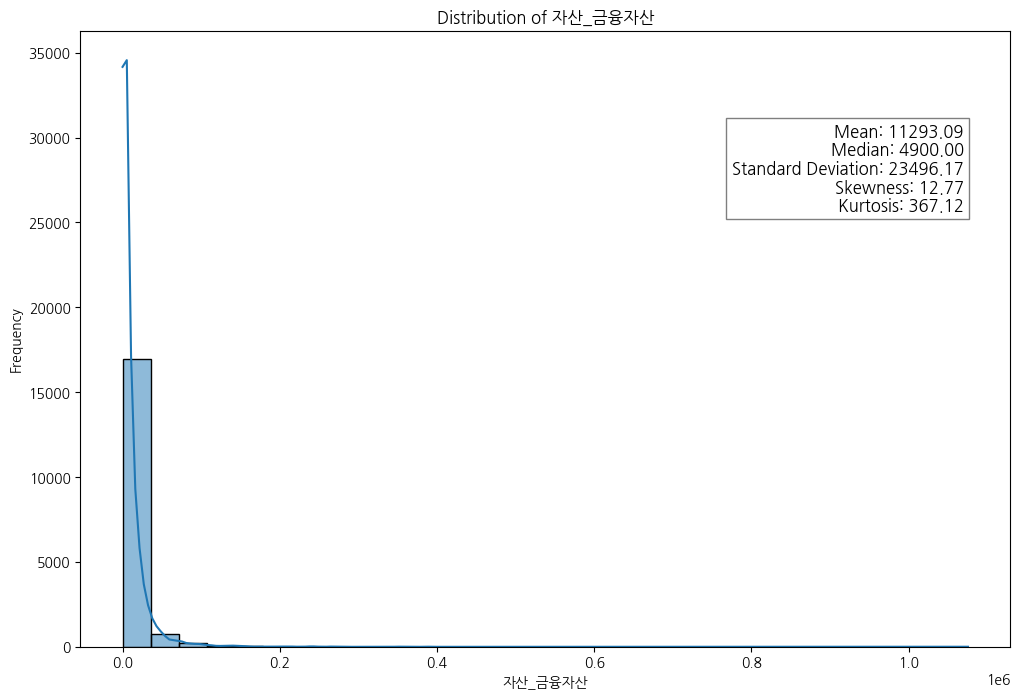

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특정 컬럼의 통계 요약 정보
column_to_plot = '자산_금융자산'  # 분석할 컬럼 이름

# 기본 통계 요약
stats_summary = df_income[column_to_plot].describe()

# 분포의 형태(왜도와 첨도) 계산
skewness = df_income[column_to_plot].skew()
kurtosis = df_income[column_to_plot].kurt()

# 히스토그램과 KDE 시각화
plt.figure(figsize=(12, 8))
sns.histplot(df_income[column_to_plot], bins=30, kde=True)
plt.title(f'Distribution of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')

# 텍스트로 통계 요약, 왜도, 첨도 추가
plt.text(0.95, 0.85, f'Mean: {stats_summary["mean"]:.2f}\n'
                     f'Median: {stats_summary["50%"]:.2f}\n'
                     f'Standard Deviation: {stats_summary["std"]:.2f}\n'
                     f'Skewness: {skewness:.2f}\n'
                     f'Kurtosis: {kurtosis:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()

###`자산_실물자산` 컬럼 값들의 분포 확인

**통계 요약 정보:**

- `Mean (평균)`: 약 38,766.72원으로, 전체 데이터의 평균 값
- `Median (중앙값)`: 17,700원으로, 데이터의 중앙값입니다.

  평균보다 훨씬 낮아, 데이터의 대부분이 작은 값에 집중되어 있음을 시사.
- `Standard Deviation (표준편차)`: 약 77,775.90원으로, 데이터가 평균으로부터
얼마나 퍼져 있는지를 나타낸다. 높은 표준편차는 데이터의 분포가 넓음을 의미.
- `Skewness (왜도)`: 약 11.62로, 오른쪽으로 긴 꼬리를 가진 분포임을 나타낸다.
이는 대부분의 값이 낮은 범위에 몰려 있고, 몇몇 큰 값들이 있다는 것을 시사
  
- `Kurtosis (첨도)`: 약 320.23으로, 매우 높은 첨도는 분포의 꼬리가 두껍고, 극단적인 값(아주 높은 값)들이 존재함을 나타낸다.

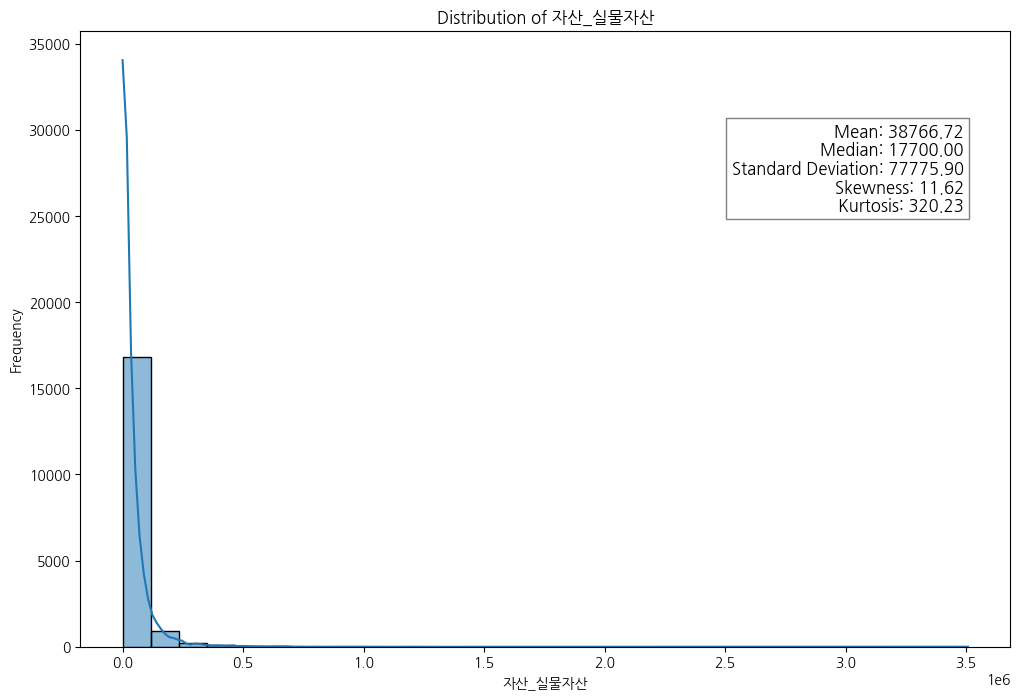

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특정 컬럼의 통계 요약 정보
column_to_plot = '자산_실물자산'  # 분석할 컬럼 이름

# 기본 통계 요약
stats_summary = df_income[column_to_plot].describe()

# 분포의 형태(왜도와 첨도) 계산
skewness = df_income[column_to_plot].skew()
kurtosis = df_income[column_to_plot].kurt()

# 히스토그램과 KDE 시각화
plt.figure(figsize=(12, 8))
sns.histplot(df_income[column_to_plot], bins=30, kde=True)
plt.title(f'Distribution of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')

# 텍스트로 통계 요약, 왜도, 첨도 추가
plt.text(0.95, 0.85, f'Mean: {stats_summary["mean"]:.2f}\n'
                     f'Median: {stats_summary["50%"]:.2f}\n'
                     f'Standard Deviation: {stats_summary["std"]:.2f}\n'
                     f'Skewness: {skewness:.2f}\n'
                     f'Kurtosis: {kurtosis:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()


# 이상치 해결하기

## 1. 로그 변환 사용하기

In [37]:
import numpy as np

# 로그 변환할 컬럼들
columns_to_log_transform = ['자산', '자산_금융자산', '자산_실물자산', '부채', '원리금상환금액', '경상소득(보완)', '지출_소비지출비', '지출_비소비지출(보완)']

# 로그 변환을 적용하고 새로운 컬럼으로 추가
for column in columns_to_log_transform:
    # np.log1p를 사용하면 log(1 + x)로 변환하여 값이 0인 경우에도 안전하게 변환할 수 있습니다.
    df_income[f'{column}_log'] = np.log1p(df_income[column])

# 변환된 데이터 확인
df_income_cleaned = df_income[columns_to_log_transform + [f'{col}_log' for col in columns_to_log_transform]]
df_income_cleaned


,자산,자산_금융자산,자산_실물자산,부채,원리금상환금액,경상소득(보완),지출_소비지출비,지출_비소비지출(보완),자산_log,자산_금융자산_log,자산_실물자산_log,부채_log,원리금상환금액_log,경상소득(보완)_log,지출_소비지출비_log,지출_비소비지출(보완)_log
0,5700,5700,0,0,0,1655,1175,121,8.648397,8.648397,0.000000,0.000000,0.000000,7.412160,7.069874,4.804021
1,13720,13220,500,0,0,2995,2790,425,9.526683,9.489562,6.216606,0.000000,0.000000,8.005033,7.934155,6.054439
2,1410,1410,0,0,110,3001,1210,109,7.252054,7.252054,0.000000,0.000000,4.709530,8.007034,7.099202,4.700480
3,16800,10300,6500,300,0,1871,1222,27,9.729194,9.239996,8.779711,5.707110,0.000000,7.534763,7.109062,3.332205
4,17000,11000,6000,9000,178,3603,1466,614,9.741027,9.305741,8.699681,9.105091,5.187386,8.189800,7.290975,6.421622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18089,5350,2550,2800,0,0,4868,3294,233,8.585039,7.844241,7.937732,0.000000,0.000000,8.490644,8.100161,5.455321
18090,77907,26044,51863,0,1050,8725,5440,964,11.263284,10.167581,10.856380,0.000000,6.957497,9.074062,8.601718,6.872128
18091,108881,17881,91000,23020,3260,18935,7310,6322,11.598020,9.791550,11.418626,10.044162,8.089789,9.848820,8.897135,8.751949
18092,164150,32460,131690,0,0,14356,4777,2128,12.008542,10.387795,11.788214,0.000000,0.000000,9.571993,8.471777,7.663408


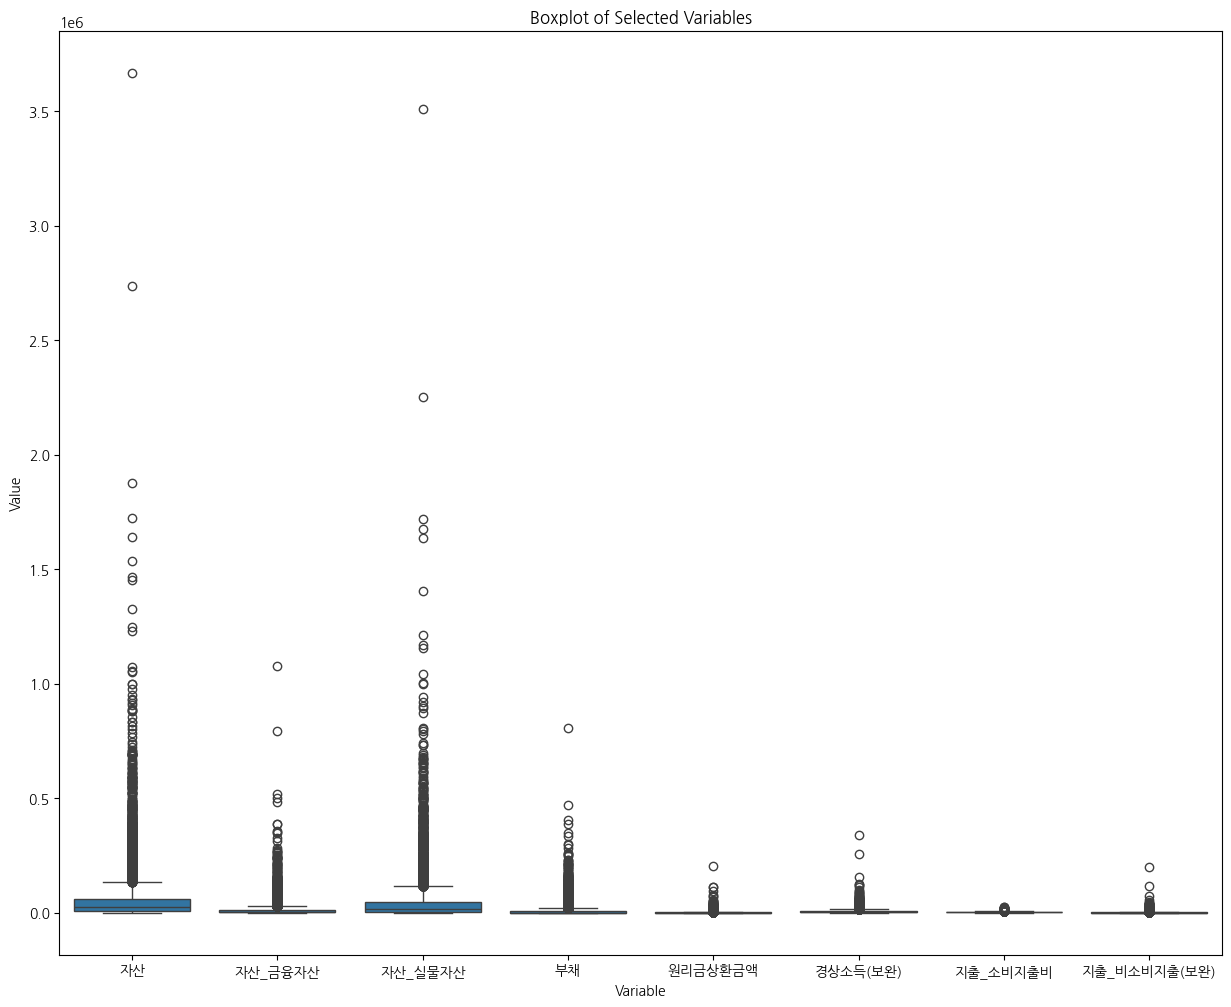

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# 분석할 주요 변수 목록
columns_to_plot = ['자산', '자산_금융자산', '자산_실물자산', '부채', '원리금상환금액', '경상소득(보완)', '지출_소비지출비', '지출_비소비지출(보완)']

# 박스플롯을 이용해 이상치 시각화
plt.figure(figsize=(15, 12))
df_melted = df_income_cleaned[columns_to_plot].melt(var_name='Variable', value_name='Value')
sns.boxplot(x='Variable', y='Value', data=df_melted)
plt.title('Boxplot of Selected Variables')
plt.show()

In [40]:
df_income_cleaned.describe()

,자산,자산_금융자산,자산_실물자산,부채,원리금상환금액,경상소득(보완),지출_소비지출비,지출_비소비지출(보완),자산_log,자산_금융자산_log,자산_실물자산_log,부채_log,원리금상환금액_log,경상소득(보완)_log,지출_소비지출비_log,지출_비소비지출(보완)_log
count,1.809400e+04,1.809400e+04,1.809400e+04,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000
mean,5.005981e+04,1.129309e+04,3.876672e+04,7608.145849,979.036642,6194.593125,2745.138223,1141.080469,9.817056,8.199183,8.211623,4.724882,3.396575,8.345821,7.683888,5.903031
std,8.903165e+04,2.349617e+04,7.777590e+04,19786.243535,3445.365396,6979.917454,1956.080362,2674.162747,1.784030,1.795806,3.871837,4.391925,3.470577,0.916895,0.704216,1.925652
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,147.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.997212,0.000000
25%,8.512500e+03,1.380000e+03,1.400000e+03,0.000000,0.000000,2282.000000,1338.000000,152.250000,9.049408,7.230563,7.244942,0.000000,0.000000,7.733246,7.199678,5.032067
50%,2.624800e+04,4.900000e+03,1.770000e+04,500.000000,30.000000,4612.500000,2262.000000,566.000000,10.175383,8.497195,9.781376,6.216606,3.433987,8.436742,7.724447,6.340359
75%,5.912900e+04,1.258000e+04,4.659875e+04,7900.000000,900.000000,8090.750000,3664.750000,1361.000000,10.987494,9.439943,10.749350,8.974745,6.803505,8.998600,8.206788,7.216709
max,3.667350e+06,1.075459e+06,3.507500e+06,807000.000000,202257.000000,338484.000000,25660.000000,199712.000000,15.114980,13.888259,15.070414,13.601080,12.217299,12.732235,10.152728,12.204637
